In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data = pd.read_csv(mouse_drug_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(trial_data, mouse_data, on='Mouse ID', how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [11]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = combined_data.groupby(['Drug', 'Timepoint'])
mean_grouped_data = grouped_data.mean()

# Convert to DataFrame
mean_tumor_vol = mean_grouped_data.drop(columns='Metastatic Sites')
mean_tumor_vol_reset_index = mean_tumor_vol.reset_index()

mean_tumor_df = pd.DataFrame({'Drug':mean_tumor_vol_reset_index['Drug'],
                         'Timepoint':mean_tumor_vol_reset_index['Timepoint'],
                         'Mean Tumor Volume (mm3)': mean_tumor_vol_reset_index['Tumor Volume (mm3)']})

# Preview DataFrame
mean_tumor_df

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [110]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
import scipy.stats
from scipy.stats import sem

standard_error = grouped_data['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
standard_error_reset_index = standard_error.reset_index()

stderr_tumor_df = pd.DataFrame({'Drug':standard_error_reset_index['Drug'],
                         'Timepoint':standard_error_reset_index['Timepoint'],
                         'SEM Tumor Volume (mm3)': standard_error_reset_index['Tumor Volume (mm3)']})


# Preview DataFrame
stderr_tumor_df.head(10)

,Drug,Timepoint,SEM Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [33]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_df_reformat = mean_tumor_df.pivot(index="Timepoint", columns="Drug")

# Preview that Reformatting worked
mean_tumor_df_reformat

Mean Tumor Volume (mm3)                                              \
Drug                    Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                       
0                       45.000000  45.000000  45.000000  45.000000  45.000000   
5                       44.266086  46.503051  47.062001  47.389175  46.796098   
10                      43.084291  48.285125  49.403909  49.582269  48.694210   
15                      42.064317  50.094055  51.296397  52.399974  50.933018   
20                      40.716325  52.157049  53.197691  54.920935  53.644087   
25                      39.939528  54.287674  55.715252  57.678982  56.731968   
30                      38.769339  56.769517  58.299397  60.994507  59.559509   
35                      37.816839  58.827548  60.742461  63.371686  62.685087   
40                      36.958001  61.467895  63.162824  66.068580  65.600754   
45                      36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

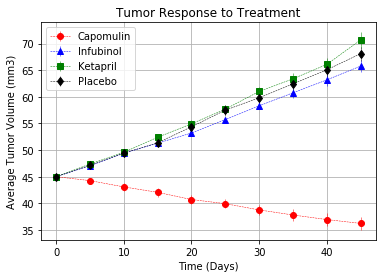

In [121]:
# x values
timepoints = np.arange(0, 50, 5)

# Capomulin: y and y-error
cap = mean_tumor_df_reformat.iloc[:,0]
cap_y = stderr_tumor_df.iloc[0:10,2]

# Infubinol: y and y-error
infu = mean_tumor_df_reformat.iloc[:,2]
infu_y = stderr_tumor_df.iloc[20:30,2]

# Ketapril: y and y-error
keta = mean_tumor_df_reformat.iloc[:,3]
keta_y = stderr_tumor_df.iloc[30:40,2]


# Placebo: y and y-error
plac = mean_tumor_df_reformat.iloc[:,5]
plac_y = stderr_tumor_df.iloc[50:60,2]


# Plot
plt.errorbar(timepoints, cap, yerr=cap_y, fmt='o', color='r', ecolor='r', label="Capomulin", linestyle='--', linewidth=0.5)
plt.errorbar(timepoints, infu, yerr=infu_y, fmt='^', color='b', ecolor='b', label="Infubinol", linestyle='--', linewidth=0.5)
plt.errorbar(timepoints, keta, yerr=keta_y, fmt='s', color='g', ecolor='g', label="Ketapril", linestyle='--', linewidth=0.5)
plt.errorbar(timepoints, plac, yerr=plac_y, fmt='d', color='k', ecolor='k', label="Placebo", linestyle='--', linewidth=0.5)

#Format
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid()
plt.show()

## Metastatic Response to Treatment

In [44]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
mean_met_site = mean_grouped_data.drop(columns='Tumor Volume (mm3)')

# Convert to DataFrame
mean_met_site_reset_index = mean_met_site.reset_index()

mean_met_df = pd.DataFrame({'Drug':mean_met_site_reset_index['Drug'],
                         'Timepoint':mean_met_site_reset_index['Timepoint'],
                         'Mean Metastatic Sites': mean_met_site_reset_index['Metastatic Sites']})

# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [48]:
# Store the Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint 
standard_error = grouped_data['Metastatic Sites'].sem()

# Convert to DataFrame
standard_error_reset_index = standard_error.reset_index()

stderr_met_df = pd.DataFrame({'Drug':standard_error_reset_index['Drug'],
                         'Timepoint':standard_error_reset_index['Timepoint'],
                         'SEM Metastatic Sites': standard_error_reset_index['Metastatic Sites']})

# Preview DataFrame
stderr_met_df.head()

,Drug,Timepoint,SEM Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [47]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df_reformat = mean_met_df.pivot(index="Timepoint", columns="Drug")

# Preview that Reformatting worked
mean_met_df_reformat

Mean Metastatic Sites                                          \
Drug                  Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                 
0                      0.000000  0.000000  0.000000  0.000000  0.000000   
5                      0.160000  0.380952  0.280000  0.304348  0.260870   
10                     0.320000  0.600000  0.666667  0.590909  0.523810   
15                     0.375000  0.789474  0.904762  0.842105  0.857143   
20                     0.652174  1.111111  1.050000  1.210526  1.150000   
25                     0.818182  1.500000  1.277778  1.631579  1.500000   
30                     1.090909  1.937500  1.588235  2.055556  2.066667   
35                     1.181818  2.071429  1.666667  2.294118  2.266667   
40                     1.380952  2.357143  2.100000  2.733333  2.466667   
45                     1.476190  2.692308  2.111111  3.363636  2.538462   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.375000  0.320000  0.120000  0.240000  0.166667  
10         0.833333  0.565217  0.250000  0.478261  0.500000  
15         1.250000  0.764706  0.333333  0.782609  0.809524  
20         1.526316  1.000000  0.347826  0.952381  1.294118  
25         1.941176  1.357143  0.652174  1.157895  1.687500  
30         2.266667  1.615385  0.782609  1.388889  1.933333  
35         2.642857  2.300000  0.952381  1.562500  2.285714  
40         3.166667  2.777778  1.100000  1.583333  2.785714  
45         3.272727  2.571429  1.250000  1.727273  3.071429

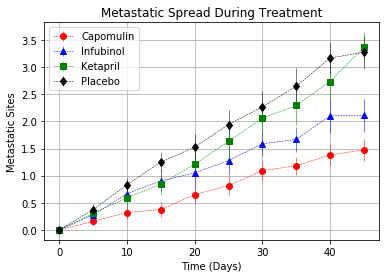

In [122]:
# Capomulin: y and y-error
c_met = mean_met_df_reformat.iloc[:,0]
c_met_y = stderr_met_df.iloc[0:10,2]

# Infubinol: y and y-error
i_met = mean_met_df_reformat.iloc[:,2]
i_met_y = stderr_met_df.iloc[20:30,2]

# Ketapril: y and y-error
k_met = mean_met_df_reformat.iloc[:,3]
k_met_y = stderr_met_df.iloc[30:40,2]


# Placebo: y and y-error
p_met = mean_met_df_reformat.iloc[:,5]
p_met_y = stderr_met_df.iloc[50:60,2]


# Plot
plt.errorbar(timepoints, c_met, yerr=c_met_y, fmt='o', color='r', ecolor='r', label="Capomulin", linestyle='--', linewidth=0.5)
plt.errorbar(timepoints, i_met, yerr=i_met_y, fmt='^', color='b', ecolor='b', label="Infubinol", linestyle='--', linewidth=0.5)
plt.errorbar(timepoints, k_met, yerr=k_met_y, fmt='s', color='g', ecolor='g', label="Ketapril", linestyle='--', linewidth=0.5)
plt.errorbar(timepoints, p_met, yerr=p_met_y, fmt='d', color='k', ecolor='k', label="Placebo", linestyle='--', linewidth=0.5)

#Format
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend()
plt.grid()
plt.show()

## Survival Rates

In [50]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mice = combined_data.groupby(['Drug', 'Timepoint'])
mouse_ct = grouped_mice['Mouse ID'].count()

# Convert to DataFrame
mouse_ct_reset = mouse_ct.reset_index()
mouse_ct_df = pd.DataFrame(mouse_ct_reset)
mouse_ct_df = mouse_ct_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouse_ct_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [51]:
# Minor Data Munging to Re-Format the Data Frames
mouse_ct_df_reformat = mouse_ct_df.pivot(index="Timepoint", columns="Drug")

# Preview the Data Frame
mouse_ct_df_reformat

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

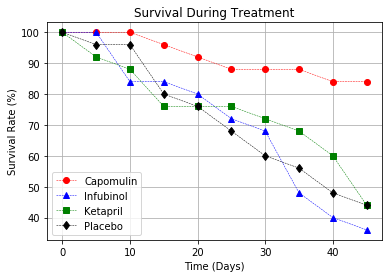

In [140]:
# y-values
c_survival_rate = mouse_ct_df_reformat.iloc[:,0]/mouse_ct_df_reformat.iloc[0,0] * 100
i_survival_rate = mouse_ct_df_reformat.iloc[:,2]/mouse_ct_df_reformat.iloc[0,0] * 100
k_survival_rate = mouse_ct_df_reformat.iloc[:,3]/mouse_ct_df_reformat.iloc[0,0] * 100
p_survival_rate = mouse_ct_df_reformat.iloc[:,5]/mouse_ct_df_reformat.iloc[0,0] * 100

# Plot
plt.plot(timepoints, c_survival_rate, '--o', c='r', label='Capomulin', linewidth=0.5)
plt.plot(timepoints, i_survival_rate, '--^', c='b', label='Infubinol', linewidth=0.5)
plt.plot(timepoints, k_survival_rate, '--s', c='g', label='Ketapril', linewidth=0.5)
plt.plot(timepoints, p_survival_rate, '--d', c='k', label='Placebo', linewidth=0.5)

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.grid()
plt.show()

## Summary Bar Graph

In [145]:
# Calculate the percent changes of tumor volume for each drug
first_timepoint = mean_tumor_df_reformat.iloc[0,:]
last_timepoint = mean_tumor_df_reformat.iloc[-1,:]

pct_change = ((last_timepoint - first_timepoint) / first_timepoint) * 100
pct_change

                         Drug     
Mean Tumor Volume (mm3)  Capomulin   -19.475303
                         Ceftamin     42.516492
                         Infubinol    46.123472
                         Ketapril     57.028795
                         Naftisol     53.923347
                         Placebo      51.297960
                         Propriva     47.241175
                         Ramicane    -22.320900
                         Stelasyn     52.085134
                         Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

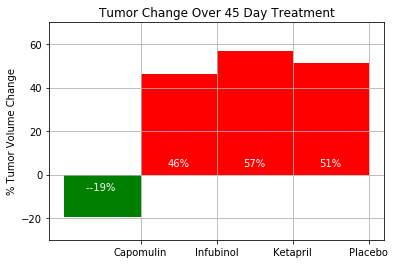